Text(0, 0.5, 'Image difference')

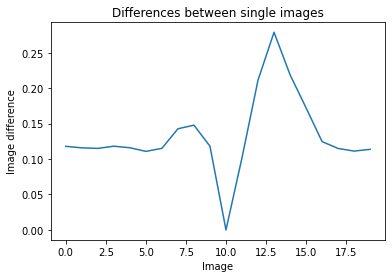

In [2]:
import cv2, os
from matplotlib import pyplot as plt

def imdiff(im1,im2):
    d = cv2.absdiff(im1,im2)
    return d.mean() / 255

path = 'images3'
images = []
for file in os.listdir(path):
    images.append(cv2.imread(os.path.join(path,file), cv2.IMREAD_GRAYSCALE))

snap = images[len(images) // 2]
diffs = []
for im in images:
    diffs.append(imdiff(im, snap))

plt.plot(diffs)
plt.title('Differences between single images')
plt.xlabel('Image')
plt.ylabel('Image difference')

Text(0.5, 1.0, 'Panorama')

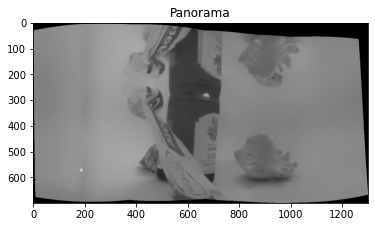

In [3]:
from matplotlib import pyplot as plt
import cv2

stitched = cv2.imread('./stitched3.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(stitched, cmap='gray')
plt.title('Panorama')

Text(0.5, 1.0, 'Single image vs. panorama')

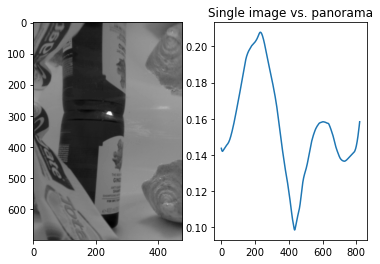

In [4]:
snap_tr = snap[0:stitched.shape[0], :]
wd = snap.shape[1]
diffs = []
for i in range(0, stitched.shape[1] - wd - 1):
    diffs.append(imdiff(stitched[:, i:(i+wd)], snap_tr))

_, ax = plt.subplots(1, 2)
ax[0].imshow(snap_tr, cmap='gray')
ax[1].plot(diffs)
plt.title('Single image vs. panorama')